<a href="https://colab.research.google.com/github/KapilKhanal/AdvLinearAlgebra/blob/master/Copy_of_Singular_Value_Decomposition_with_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Values Decomposition and Images

In this project, we use the Singular Value Decomposition (SVD) to analyze a matrix which represents a picture and represent the picture using fewer than all of the singular values. 

First, we will import an image of a racoon and save it to our local directory (within Colab).

In [0]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

In [3]:
#  Generate a picture to analyze and save it in our directory.
face = misc.face()
imageio.imwrite('face.png', face) #create the image file
#face = imageio.imread('face.jpg') # read in the image file
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [4]:
#  Read in face image:
origImg = misc.face()
origImg.shape, origImg.dtype
#  The image contains three colors of data.  Color data extends from 0 to 256.
#  The pixel in entry [100, 100] has values of 94/256 for Red, 82/256 for green, and 92/256 for blue:
origImg[100][100]

array([94, 82, 92], dtype=uint8)

#  1.  The code below is used to adjust the number of singular values used within the image.

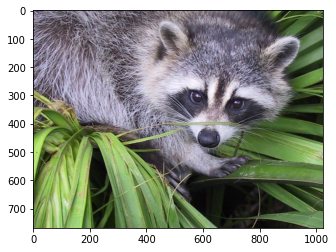

In [5]:
#make a copy of the image
copyImg = origImg.copy()
plt.imshow(copyImg, origin='upper')

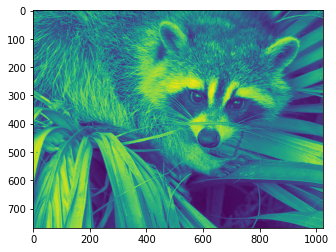

In [6]:
#  We'll split the array of colors into three separate matrices:

#  The code below makes a copy of the color data in copyImg[i][j][0] 
#  and puts it into r_image[i][j][0], but leaves the other two colors blank.

#  First, make a matrix to hold the data for the first color.
#(rows, columns, colors) = copyImg.shape

#  Then, copy over the color data:
#r_image = np.random.randn(rows, columns)
#for i in range(rows):
#    for j in range(columns):
#        r_image[i][j] = copyImg[i][j][0]

#  This is a faster way of doing that same code:
r_image = copyImg[:, :, 0]

#  YOU:  creage a g_image and a b_image matrix which contains data for the green and blue pixels.

g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]

plt.imshow(g_image)

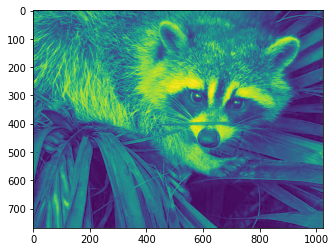

In [7]:
plt.imshow(b_image)

In [0]:
# decompose the matrix a, representing the color 0, using SVD:
Ur, sr, Vhr = linalg.svd(r_image)
Ur.shape, sr.shape, Vhr.shape
Mr,Nr = r_image.shape
Sigr = linalg.diagsvd(sr,Mr,Nr)

def svd(image_hue):
  Ur, sr, Vhr = linalg.svd(image_hue)
  Ur.shape, sr.shape, Vhr.shape
  Mr,Nr = image_hue.shape
  Sigr = linalg.diagsvd(sr,Mr,Nr)
  return (Sigr,Vhr,Ur)

# YOU:  do the same for the other two colors:

#For blue color
sigr_blue = svd(b_image)[0]
sigr_green = svd(g_image)[0]

In [9]:
Ur.shape, sr.shape, Vhr.shape

((768, 768), (768,), (1024, 1024))

In [0]:
# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()
Ssigr_blue = sigr_blue.copy()
Ssigr_green = sigr_green.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 5
ZeroTo = min(SSigr.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0

def eliminate(sigr_matrix):
  ZeroAfter = 5
  ZeroTo = min(sigr_matrix.shape) - 1
  for i in range(ZeroAfter,ZeroTo):
      sigr_matrix[i][i] = 0
  return sigr_matrix

# YOU: Modify the code above to do the same thing for the other two colors.
Ssigr_blue = eliminate(Ssigr_blue)
Ssigr_green = eliminate(Ssigr_green)

In [0]:
# compute the new matrix using just these singular values for the red color:
new_r_image = Ur.dot(SSigr.dot(Vhr))

# YOU:  Do this for the other two colors:
#Blue
Ur_b = svd(b_image)[2]
Vhr_b = svd(b_image)[1]
new_b_image = Ur_b.dot(Ssigr_blue.dot(Vhr_b))

#Green
Ur_g = svd(g_image)[2]
Vhr_g = svd(g_image)[1]
new_g_image = Ur_g.dot(Ssigr_green.dot(Vhr_g))


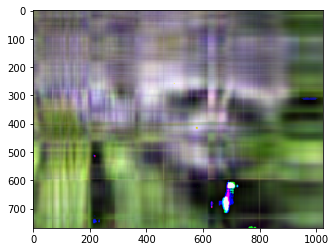

In [12]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
newImg[:,:,0] = new_r_image

# YOU:  Modify the code above to pack the data for the other two colors:
newImg[:,:,1] = new_g_image
newImg[:,:,2] = new_b_image
plt.imshow(newImg, origin='upper')

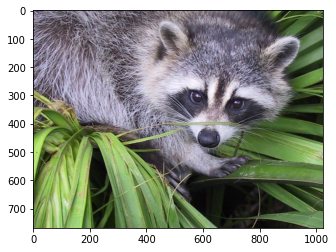

In [13]:
#Original image:
plt.imshow(copyImg, origin='upper')

In [0]:
#  save the image to your directory
filename = 'face_svd_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.

Adapting code from above for different ZeroAfter values

In [0]:
def ZeroAfter_different(ZeroAfter):
  
  Ssigr_blue = sigr_blue.copy()
  Ssigr_green = sigr_green.copy()
  SSigr = Sigr.copy()
  
  def eliminate(sigr_matrix):
    ZeroTo = min(sigr_matrix.shape) - 1
    for i in range(ZeroAfter,ZeroTo):
        sigr_matrix[i][i] = 0
    return sigr_matrix

  # YOU: Modify the code above to do the same thing for the other two colors.

  Ssigr_blue = eliminate(Ssigr_blue)
  Ssigr_green= eliminate(Ssigr_green)
  
  new_r_image = Ur.dot(SSigr.dot(Vhr))

  # YOU:  Do this for the other two colors:
  #Blue
  Ur_b = svd(b_image)[2]
  Vhr_b = svd(b_image)[1]
  new_b_image = Ur_b.dot(Ssigr_blue.dot(Vhr_b))

  #Green
  Ur_g = svd(g_image)[2]
  Vhr_g = svd(g_image)[1]
  new_g_image = Ur_g.dot(Ssigr_green.dot(Vhr_g))

  # pack the data from your new matrix back into the image.  
  newImg = origImg.copy()
  newImg.fill(0)

  # We could do this with loops:
  #(rows, columns, colors) = newImg.shape
  #for i in range(rows):
  #    for j in range(columns):
  #        newImg[i][j][0] = new_r_image[i][j]

  # But this code does it much faster:
  newImg[:,:,0] = new_r_image

  # YOU:  Modify the code above to pack the data for the other two colors:
  newImg[:,:,1] = new_g_image
  newImg[:,:,2] = new_b_image
  plt.imshow(newImg, origin='upper')
  return None



In [0]:
#For ZeroAfter = 1
ZeroAfter_different(1)

In [0]:
ZeroAfter_different(768)

In [0]:
ZeroAfter_different(50)

#2.  Analyze the impact of singular values.



Go back to Section 1, and adjust the code just using the ZeroAfter value.  Do this for several different values of ZeroAfter (e.g. 1, 5, 10, 15, 20, 25, 50, 100, 500, and 768).

Then, analyze the results by answering the following questions:

# Question 0:  
How large is the original picture?  ( size depends on rows, columns, and colors)

  ### **Solution : (768, 1024, 3)** 

How large is the SVD decomposition?  (size depends on number of svds, number of eigenvectors used and size of matrices & and Vh, and number of colors)
### **Solution : ((768, 768), (768,), (1024, 1024))**
How do these sizes compare?

#  Question 1:
What do you expect to see if we use just 1 singular value?
## Solution : The image has shades of all color but has stripes in it 
Did you see what you expected?
## Solution: No, I was expecting to see blur images
# Question 2:
What do you expect to see if we use all of the singular value?
## Solution : I expect to see whole picture 

Did you see what you expected?
## Solution : Yes, using all of the singular value gave the images back

#  Question 3:
Create images using 1, 5, 10, 20, or 25 singular value.  What happens to the image when we include more singular values?

#Solution : It goes from being blur to more clearer..there is improvement in the quality of the images
# Question 4:
How many singular values do you need before you can roughly understand the picture?
#Solution : Around 7 singular values gave a more clearer picture

# Question 5:

How many singular values do you need to include to eliminate the color artifacts in the image?
#Solution : Around 20..gave a more clearer picture with less color striped lines
#  Question 6:

What is the behaviour of the singular values?  
The plot below shows each singular value on the horizontal axis, and the value of each singular value on the vertical axis.  What does this plot tell you about the singular values?

## SOLuTION : The magnitude of singular values decreases as the number of singular values. The singualr values with high magnitude gives a approximation of images


In [0]:
#  Plot the first NumberOfSigs singular values

#  Make this 768 or less:
NumberOfSigs = 10  
x = np.linspace(1,NumberOfSigs,NumberOfSigs)
plt.plot(x,Sigr[0:NumberOfSigs], 'o', color='red');
plt.plot(x,Ssigr_blue[0:NumberOfSigs], 'o', color='blue');
plt.plot(x,Ssigr_green[0:NumberOfSigs], 'o', color='green');
